In [54]:
import numpy as np
import matplotlib.pyplot as plt 
from copy import deepcopy, copy
import csv
import networkx as nx
import random

# Zadanie 1 - Gauss-Jordan

In [55]:
# it destroys A matrix making it identity matrix
# result after invoking the function is in array B
# pivoting function returns numbers of swapped columns if there was a change
def gauss_jordan(A, B, pivoting):
    perm = [i for i in range(len(A))]
    for i in range(len(A[0])):
        c1, c2 = pivoting(A, B, i)
        perm[c1], perm[c2] = perm[c2], perm[c1]
        # counting
        for j in range(len(A)):
            if j != i: 
                d = -A[j][i]/A[i][i]
                for k in range(i, len(A[i])):
                    A[j][k] += d*A[i][k]
                B[j] += d*B[i]
        d = A[i][i]
        for k in range(i, len(A[0])):
            A[i][k] /= d
        B[i] /= d
    #restore order
    res = [0 for i in range(len(perm))]
    for i in range(len(perm)):
        res[perm[i]] = B[i]
    B[:] = res[:]

In [56]:
A = np.random.rand(10,10)
B = np.random.rand(10)

## Bez pivotingu

In [57]:
def no_pivoting(A, B, i):
    return i,i

In [58]:
An = deepcopy(A)
Bn = copy(B)
gauss_jordan(An, Bn, pivoting=no_pivoting)
print(An)
print((A @ Bn) - B)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.55111512e-17
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.55111512e-17
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  -1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.44089210e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.88178420e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00

## Partial pivoting

In [59]:
def swap_rows(A, B, i, j):
    A[[i,j]] = A[[j,i]]
    B[i], B[j] = B[j], B[i]
def swap_columns(A, B, i, j):
    A[:, [j,i]] = A[:, [i,j]]

In [60]:
def partial_pivoting(A, B, i):
    besti = i
    for j in range(i+1,len(A)):
        if A[besti][i] < A[j][i]:
            besti = j
    swap_rows(A, B, i, besti)
    return i, i

In [61]:
Ap = deepcopy(A)
Bp = copy(B)
gauss_jordan(Ap, Bp, pivoting=partial_pivoting)
print(Ap)
print(A @ Bp - B)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00

## Full pivoting

In [62]:
def full_pivoting(A, B, i):
    bestj = i
    bestk = i
    for j in range(i,len(A)):
        for k in range(i, len(A[j])):
            if abs(A[bestj][bestk]) < abs(A[j][k]):
                bestj = j
                bestk = k
    swap_rows(A, B, i, bestj)
    swap_columns(A, B, i, bestk)
    return i, bestk

In [63]:
Af = deepcopy(A) #np.array([[1.,-4.,4.,7.], [0.,2.,-1.,0.], [2.,1.,1.,4.], [2.,-3.,2.,-5.]]) #deepcopy(A)
Bf = copy(B) #np.array([4.,5.,2.,9.])#copy(B)
gauss_jordan(Af, Bf, pivoting=full_pivoting)
print(Af)
print(A @ Bf - B)

[[ 1.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -5.55111512e-17  0.00000000e+00
   0.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.38777878e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  5.55111512e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.55111512e-17  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00

# Zadanie 2

In [64]:
def LU(A):
    for i in range(len(A[0])):
        #counting
        for j in range(i+1, len(A)):
            d = -A[j][i]/A[i][i]
            for k in range(i, len(A[i])):
                A[j][k] += d*A[i][k]
            A[j][i] = -d;
    L = np.zeros((len(A), len(A)))
    U = np.zeros((len(A), len(A)))
    for i in range(len(A[0])):
        for j in range(len(A)):
            if i==j:
                L[i][j] = 1
                U[i][j] = A[i][j]
            elif i < j:
                L[i][j] = 0
                U[i][j] = A[i][j]
            else:
                L[i][j] = A[i][j]
                U[i][j] = 0
    return L, U
                

In [65]:
A = np.random.rand(5,5)
print(A)
L, U = LU(A)
print(L)
print(U)
print(L @ U)

[[4.86796596e-02 8.92330388e-01 3.76214236e-01 9.06820619e-01
  4.46924322e-01]
 [8.70155491e-01 2.55880965e-01 7.58417035e-01 3.36448943e-01
  1.56075524e-01]
 [6.06265825e-02 5.87014046e-01 7.92672594e-01 9.39948753e-01
  7.25509284e-01]
 [4.64336912e-04 4.38401870e-01 6.94991559e-02 3.73864798e-01
  8.72534165e-01]
 [8.53976771e-01 7.36895597e-01 5.86811105e-02 9.10886974e-01
  5.23683579e-01]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.78751351e+01  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.24541920e+00  3.34070213e-02  1.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 9.53862282e-03 -2.73908878e-02 -1.86295059e-01  1.00000000e+00
   0.00000000e+00]
 [ 1.75427844e+01  9.50455631e-01 -1.66263372e+00 -1.08188081e+02
   1.00000000e+00]]
[[ 4.86796596e-02  8.92330388e-01  3.76214236e-01  9.06820619e-01
   4.46924322e-01]
 [ 0.00000000e+00 -1.56946453e+01 -5.96646326e+00 -1.58730921e+01
  -7.83275711e+00]
 [ 

# Zadanie 3

In [66]:
# File format:
# node1,node2,resistance_between_them
# and exactly one row as s,node1,node2,sem - source
def import_graph_from_file(file):
    records = []
    G = nx.Graph()
    with open(file, "r") as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            records.append(row)
    for i, record in enumerate(records):
        if record[0] == 's':
            G.add_edge(int(record[1]), int(record[2]), R=0, sem=int(record[3]), no=i)
        else:
            G.add_edge(int(record[0]), int(record[1]), R=abs(int(record[2])), no=i, sem=0)
    return G

In [67]:
# we assume that current flows from node with bigger no to one with smaller
def eqs_Kirchoff_I(G):
    eqs = []
    b = [0 for i in range(len(G.nodes))]
    for n in G.nodes:
        I = [0 for i in range(len(G.edges))]
        for e in G.edges(n):
            data = G.get_edge_data(*e)
            I[data['no']] = 1 if e[0] > e[1] else -1
        eqs.append(I)
    return eqs, b

In [68]:
def eqs_Kirchoff_II(G):
    eqs = []
    b = []
    for cycle in nx.cycle_basis(G):
        I = [0 for i in range(len(G.edges))]
        b.append(0)
        for i in range(len(cycle)):
            n1 = cycle[i]
            n2 = cycle[(i + 1) % len(cycle)]
            data = G.get_edge_data(n1, n2)
            I[data['no']] = data['R'] if n1 > n2 else -data['R']
            b[-1] += data['sem'] if n1 > n2 else -data['sem']
        eqs.append(I)
    return eqs, b

In [69]:
def create_eqs(G):
    eqs, b = eqs_Kirchoff_I(G)
    eqs2, b2 = eqs_Kirchoff_II(G)
    eqs += eqs2
    b += b2
    return eqs, b

In [70]:
def solve(A, B, G):
    I = np.linalg.lstsq(A, B, rcond=None)[0]
    for e in G.edges:
        edg = G.get_edge_data(*e)
        edg['I'] = I[edg['no']]
    return G

In [71]:
def validate(G, eps = 1e-8):
    for n in G.nodes:
        sum = 0
        for e in G.edges(n):
            I = G.get_edge_data(*e)['I']
            sum += I if e[0] > e[1] else -I
        if abs(sum) > eps:
            raise Exception('Currents in node don\'t sum up to 0')
                

In [72]:
def as_directed_graph(G):
    DG = nx.DiGraph()
    for e in G.edges:
        edg = G.get_edge_data(*e)
        if edg['I'] > 0:
            DG.add_edge(min(*e), max(*e), I=abs(edg['I']))
        else:
            DG.add_edge(max(*e), min(*e), I=abs(edg['I']))
    return DG

In [73]:
def visualize_graph(G, layout=nx.layout.spring_layout):
    edge_colors = list(map(lambda x: x[2]['I'], G.edges.data()))
    pos = layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=5, node_color='blue')
    nx.draw_networkx_edges(G, pos, width=4, edge_color=edge_colors, edge_cmap=plt.cm.Blues, with_labels=True)
    ax = plt.gca()
    ax.set_axis_off()
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.show()

In [74]:
def process_graph(G):
    I, E = create_eqs(G)
    G = solve(I, E, G)
    validate(G)
    G = as_directed_graph(G)
    return G

In [75]:
def process_graph_file(file):
    G = import_graph_from_file(file)
    return process_graph(G)

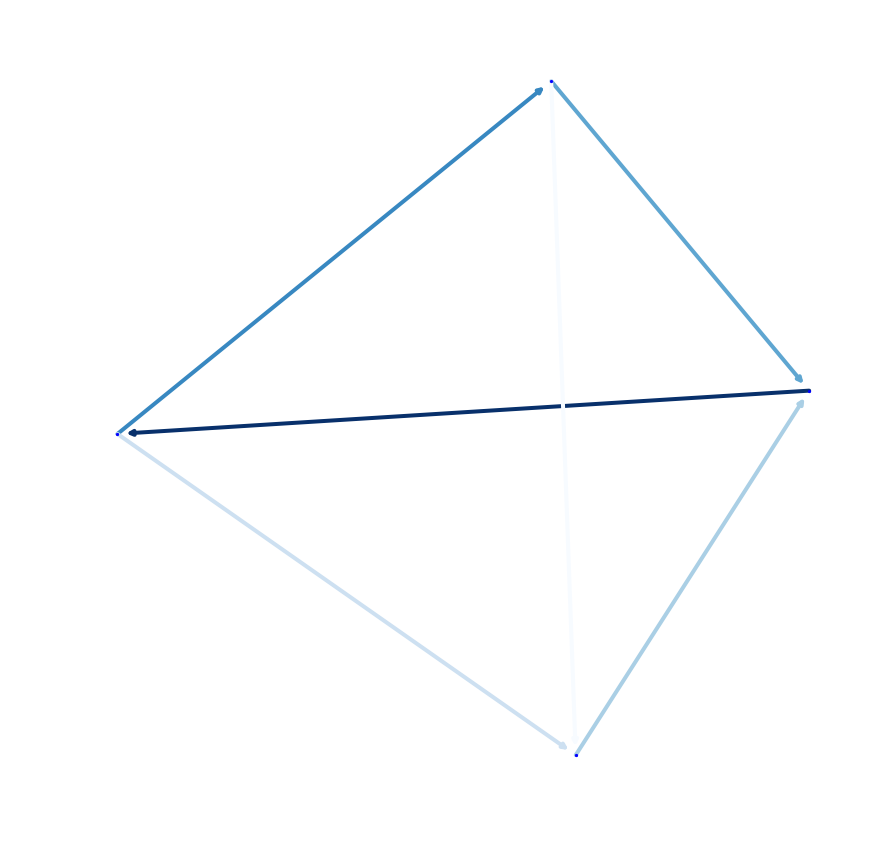

In [135]:
visualize_graph(process_graph_file('./graphs/small.csv'))

In [88]:
def generate_graph(src, dest, gen, *arg):
    G = gen(*arg)
    nsrc = list(G.nodes)[src]
    ndest = list(G.nodes)[dest]
    G.add_edge(nsrc, ndest, R=0, sem=random.random()*100)
    for i,e in enumerate(G.edges.data()):
        edata = e[2]
        val = random.random()*10
        edata['sem'] = 0 if 'sem' not in edata else edata['sem']
        edata['R'] = random.random()*10 if edata['sem'] == 0 else 0 
        edata['no'] = i
    return G

In [158]:
def save_graph_as_file(G, file_name):
    with open('./graphs/' + file_name, 'w+') as file:
        writer = csv.writer(file)
        for e in G.edges.data():
            if 'sem' in e[2] and e[2]['sem'] != 0:
                writer.writerow(['s', e[0], e[1], e[2]['sem']])
            else:
                writer.writerow([e[0], e[1], e[2]['R']])
        file.close()

In [159]:
def get_edge_colors(G):
    return list(map(lambda x: x[2]['I'], G.edges.data()))

In [160]:
def prepare_and_show(file = None):
    ax = plt.gca()
    ax.set_axis_off()
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    if file:
        fig.savefig('./results_png/'+file+'.png', dpi=300)
    plt.show()

In [161]:
node_default = {
    'node_size': 5,
    'node_color': 'blue'
}
edge_default = {
    'width': 4, 
    'edge_cmap': plt.cm.Blues, 
    'with_labels': True
}

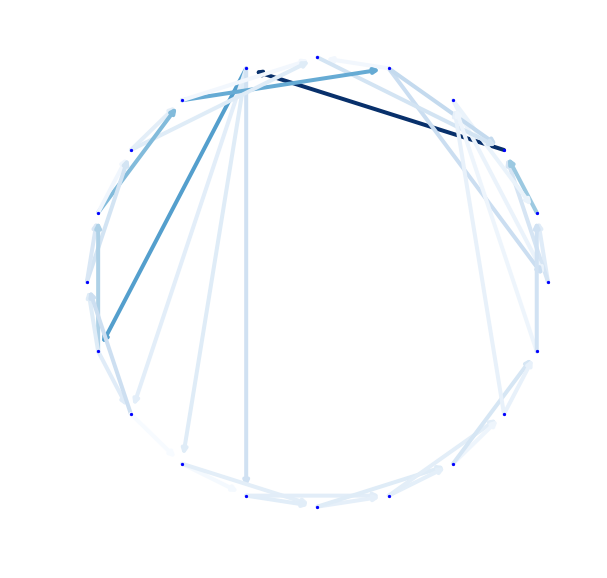

In [168]:
CG = generate_graph(1,10, nx.generators.classic.circulant_graph, 20, [1,2])
# save_graph_as_file(CG, 'circulant')
CG = process_graph(CG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(CG)
pos = nx.circular_layout(CG)
nx.draw_networkx_nodes(CG, pos, **node_default)
nx.draw_networkx_edges(CG, pos, **edge_prop)
prepare_and_show()

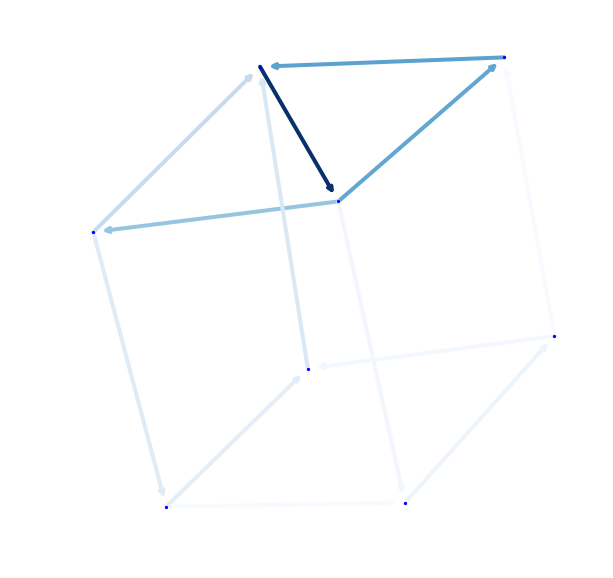

In [169]:
CbG = generate_graph(1,3, nx.generators.small.cubical_graph)
# save_graph_as_file(CbG, 'cubic')
CbG = process_graph(CbG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(CbG)
pos = nx.layout.kamada_kawai_layout(CbG)
nx.draw_networkx_nodes(CbG, pos, **node_default)
nx.draw_networkx_edges(CbG, pos, **edge_prop)
prepare_and_show()

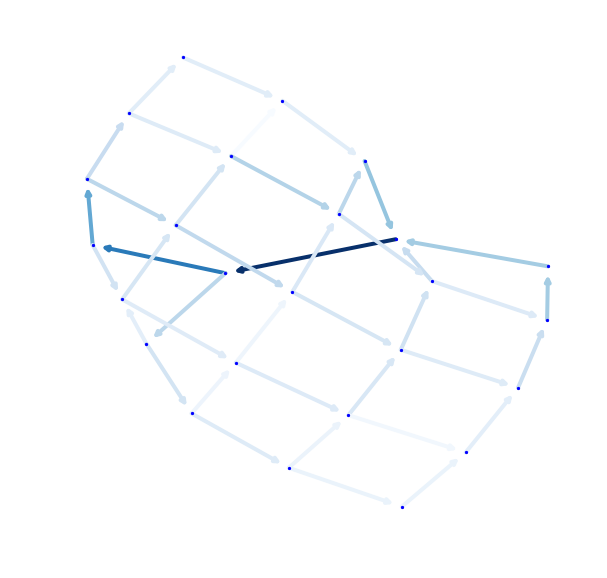

In [173]:
GG = generate_graph(1,-1, nx.generators.lattice.grid_2d_graph, 5, 5)
# save_graph_as_file(GG, 'grid.csv')
GG = process_graph(GG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(GG)
init_pos = nx.layout.circular_layout(GG)
init_pos[list(GG.nodes)[0]]=[-1,-1]
pos = nx.layout.kamada_kawai_layout(GG, pos = init_pos)
nx.draw_networkx_nodes(GG, pos, **node_default)
nx.draw_networkx_edges(GG, pos, **edge_prop)
prepare_and_show()

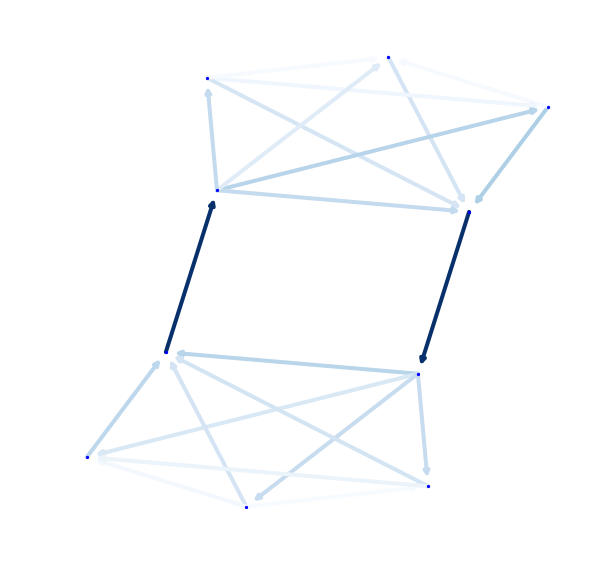

In [175]:
BG = generate_graph(1, 7, nx.generators.classic.barbell_graph, 5, 0)
# save_graph_as_file(BG, 'bridge.csv')
BG = process_graph(BG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(BG)
pos = nx.layout.kamada_kawai_layout(BG)
nx.draw_networkx_nodes(BG, pos, **node_default)
nx.draw_networkx_edges(BG, pos, **edge_prop)
prepare_and_show()

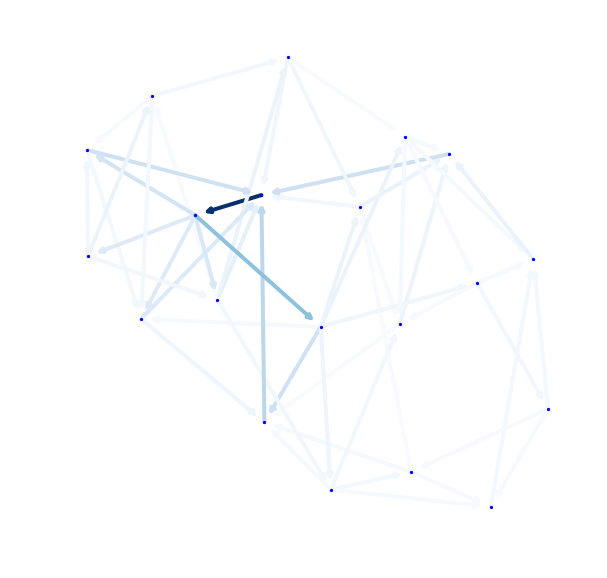

In [185]:
RG = generate_graph(1, 7, nx.generators.random_graphs.newman_watts_strogatz_graph, 20, 4, 0.3)
# save_graph_as_file(RG, 'random2.csv')
RG = process_graph(RG)
edge_prop = {**edge_default}
edge_prop['edge_color'] = get_edge_colors(RG)
pos = nx.layout.kamada_kawai_layout(RG)
nx.draw_networkx_nodes(RG, pos, **node_default)
nx.draw_networkx_edges(RG, pos, **edge_prop)
prepare_and_show()

In [126]:
def test_random(n):
    G = generate_graph(1, random.randint(2,n-1), 
                       nx.generators.random_graphs.newman_watts_strogatz_graph, n, random.randint(1,n), 0.3)
    process_graph(G)

In [128]:
test_random(1000)
#for i in [100,200,500,1000,2000,5000]:
#   test_random(i)

KeyboardInterrupt: 